<h1>CIFAR-10 Dataset Classfication</h1>

<h2>CIFAR-10 dataset</h2>

The **CIFAR-10** dataset is a computer vision dataset used for object recognition. It consists of 60,000 images belonging to 10 classes with 6000 images per class. The label classes in the dataset are:
* airplane 
* automobile 
* bird 
* cat 
* deer 
* dog 
* frog 
* horse 
* ship 
* truck

<h2>1. Importing Utility Packages</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Activation
import time

<h2>2. Visualizations</h2>

We load the **Cifar-10** dataset in the code below. Few observations are as follows, 
* Training dataset: 50000 images are loaded with shape (50000, 32, 32, 3)
* Testing dataset: 10000 images are loaded with shape (10000, 32, 32, 3)

In [2]:
# define num_class
num_classes = 10

# load dataset keras will download cifar-10 datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# Define class names
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                        'dog', 'frog', 'horse', 'ship', 'truck'])

### **Plot 1: Sample images belonging to each class**

This plot showcases one image belonging to each of the 10 class in the dataset. We can notice that the input images have a shape of (32, 32, 3) which denotes that the images have a pixel size of 32 * 32 and have three colour channels(R, G, B).

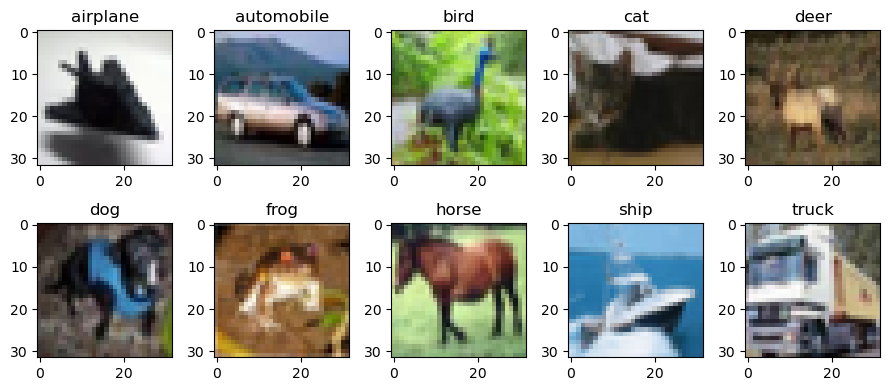

In [4]:
# Dictionary to store the first image of each class
images = {}

for i in range(len(classes)):
    # Finding the first image of the respected class
    idx = np.where(y_train == i)[0][0]
    # Adding the obtained image to the dictionary 
    images[classes[i]] = x_train[idx]

# subplots created for one image per class
fig, axs = plt.subplots(2, 5, figsize=(9, 4))
axs = axs.ravel()
for i in range(len(classes)):
    axs[i].imshow(images[classes[i]])
    axs[i].set_title(classes[i])
plt.tight_layout()
plt.show()


### **Plot 2: Distribution of images with respect to class**

This visualization displays the number images belonging to each class in the dataset. We can infer from the plots that both the training set and the testing set have equal distribution of the images for respective classes in the dataset. Such an equal distribution of the images for all classes overcomes the **class imbalance problem** of classification algorithms.

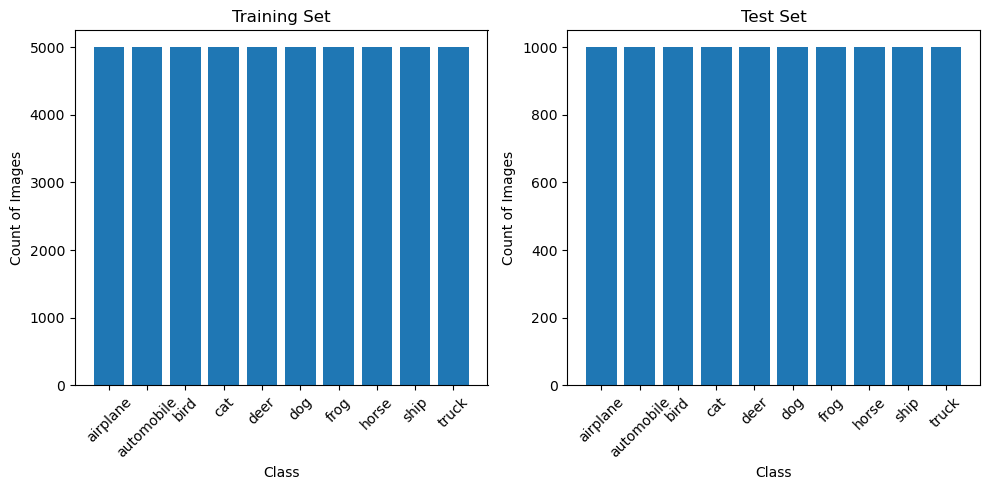

In [5]:
# total number of classes in the training and test sets
train_images = np.unique(y_train, return_counts=True)
test_images = np.unique(y_test, return_counts=True)

# bar chart for the count of images in training and test set per class
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(classes[train_images[0]], train_images[1])
axs[0].set_title("Training Set")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Count of Images")
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(classes[test_images[0]], test_images[1])
axs[1].set_title("Test Set")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Count of Images")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

 # <h1>3. Classification Modelling</h1>

# 3.1 Random Forest Classifier

In [6]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

# Data to be reshaped to a 2D array
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Splitting the training data into train and validation sets
x_train, x_val_rf, y_train, y_val_rf = train_test_split(x_train, y_train, test_size=0.2, random_state=45)

In [7]:
# Defining Random Forest Classifier model
random_forest = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=45)

In [8]:
# Training the Random Forest Classifier model 
start_time = time.time()
random_forest.fit(x_train, y_train.ravel())
end_time = time.time()

In [9]:
# Calculating the training time
training_time_random_forest_classifier = (end_time - start_time) / 60
print('Training Time in minutes: {:.1f}'.format(training_time_random_forest_classifier))


Training Time in minutes: 2.9


In [10]:
# Predictions on the validation set
y_pred_random_forest = random_forest.predict(x_val_rf)

# Accuary of the Random Forest Classifier model on Validation set
accuracy = accuracy_score(y_val_rf, y_pred_random_forest)
print('Validation accuracy:', accuracy)

Validation accuracy: 0.4555


In [11]:
# Predictions on the test dataset
y_pred_test_random_forest = random_forest.predict(x_test)

# Accuary of the Random Forest Classifier model on Test set
accuracy_test_random_forest = accuracy_score(y_test, y_pred_test_random_forest)
print('Test accuracy:', accuracy_test_random_forest)


Test accuracy: 0.4606


Accuracy for the Random Forest Classifier Model is **46%**

### 3.1.1 Confusion Matrix and Classification Report

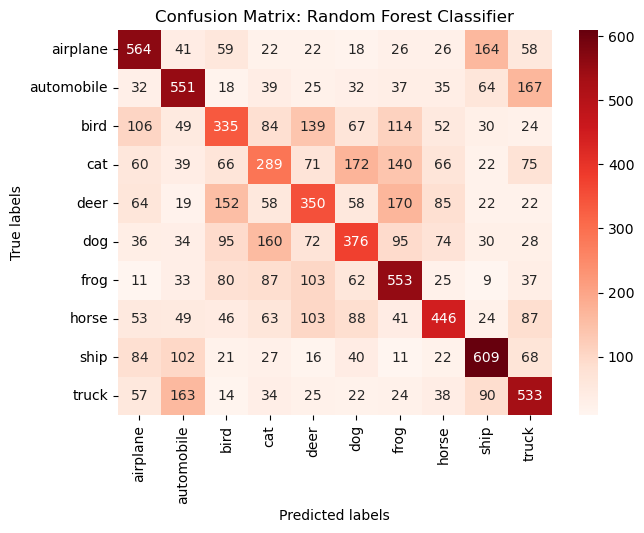

In [12]:
# Calculating the confusion matrix 
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_test_random_forest)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_random_forest, annot=True, cmap='Reds', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.show()

In [13]:
# Classification report for the Random Forest Classifier
print(classification_report(y_test, y_pred_test_random_forest, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.53      0.56      0.55      1000
  automobile       0.51      0.55      0.53      1000
        bird       0.38      0.34      0.36      1000
         cat       0.33      0.29      0.31      1000
        deer       0.38      0.35      0.36      1000
         dog       0.40      0.38      0.39      1000
        frog       0.46      0.55      0.50      1000
       horse       0.51      0.45      0.48      1000
        ship       0.57      0.61      0.59      1000
       truck       0.48      0.53      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



### 3.1.2 Predictions

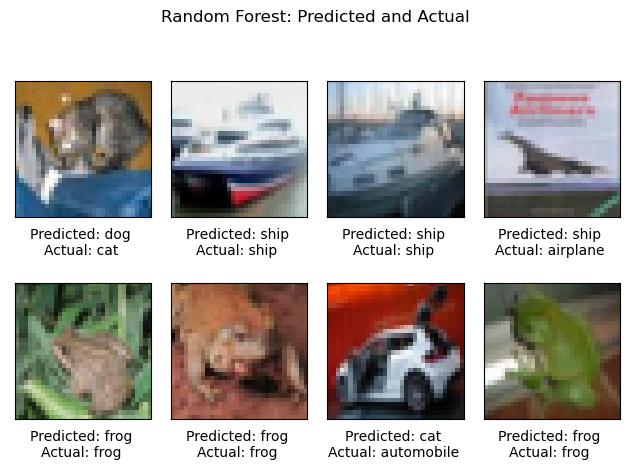

In [14]:
# Plotting the images with Predicted and Actual class
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape((32, 32, 3)), cmap=plt.cm.binary)
    predicted_label = y_pred_test_random_forest[i]
    true_label = y_test[i][0]
    plt.xlabel("Predicted: {} \nActual: {} ".format(classes[predicted_label],classes[true_label]))
plt.suptitle('Random Forest: Predicted and Actual')
plt.tight_layout()    
plt.show()

# 3.2 SVM with Kernel

In [15]:
# load dataset keras will download cifar-10 datset
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# Data to be reshaped to a 2D array
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [16]:
# Splitting the training data into train and validation sets
x_train, x_val_svm, y_train, y_val_svm = train_test_split(x_train, y_train, test_size=0.2, random_state=45)

In [17]:
# Performing PCA for dimensionality reduction
pca = PCA(n_components=100, random_state=42)

# Creating a SVM Classifier
svm = SVC(kernel='rbf', C=10, random_state=42)

In [19]:
# Creating a pipeline with PCA and SVM
pipeline = make_pipeline(StandardScaler(), pca, svm)

# Pipeline is fitted on the training data
start_time = time.time()
pipeline.fit(x_train, y_train.ravel())
end_time = time.time()

In [20]:
# Calculating the training time
training_time_svm = (end_time - start_time) / 60
print('Training Time in minutes: {:.1f}'.format(training_time_svm))

Training Time in minutes: 3.3


In [21]:
# Predictions on the validation set
y_pred_val_svm = pipeline.predict(x_val_svm)

# Accuarcy of the SVM model on the validation set
val_accuracy = accuracy_score(y_val_svm, y_pred_val_svm)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.55


In [22]:
# Prediction on the test set
y_pred_test_svm = pipeline.predict(x_test)

# Accuracy of the SVM model on the test dataset
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
print(f'Test Accuracy: {test_accuracy_svm:.2f}')

Test Accuracy: 0.55


Acuuarcy for the SVM with kernal model is **55%**

### 3.2.1 Confusion Matrix and Classfication Report 

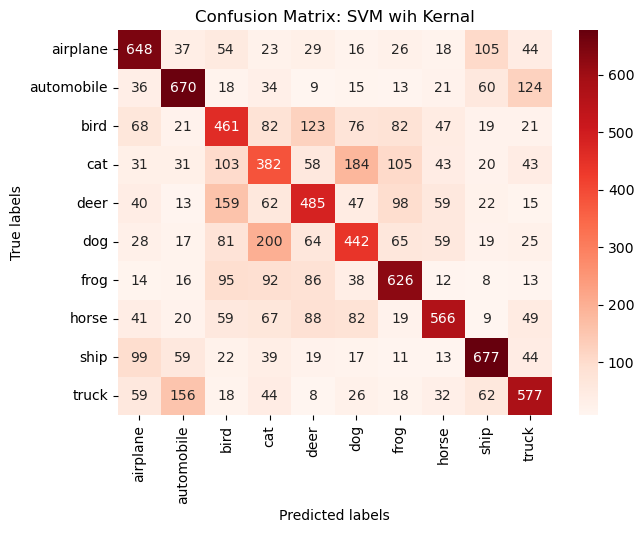

In [23]:
# Calculate the confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred_test_svm)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_svm, annot=True, cmap='Reds', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: SVM wih Kernal')
plt.show()

In [24]:
# Classification report for Support Vector Machine model with Kernel
print(classification_report(y_test, y_pred_test_svm, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.61      0.65      0.63      1000
  automobile       0.64      0.67      0.66      1000
        bird       0.43      0.46      0.45      1000
         cat       0.37      0.38      0.38      1000
        deer       0.50      0.48      0.49      1000
         dog       0.47      0.44      0.45      1000
        frog       0.59      0.63      0.61      1000
       horse       0.65      0.57      0.61      1000
        ship       0.68      0.68      0.68      1000
       truck       0.60      0.58      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



### 3.2.2 Predictions

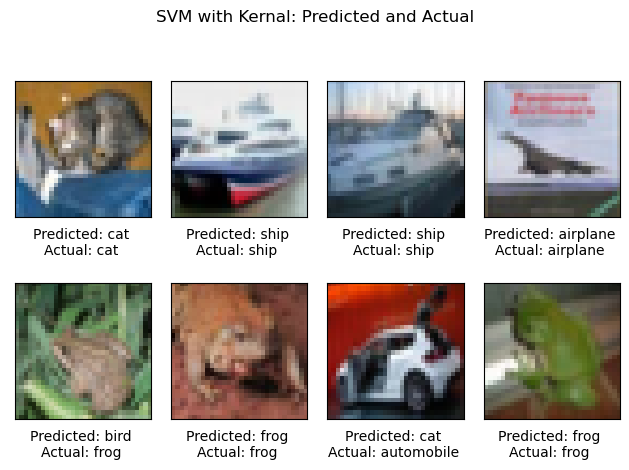

In [25]:
# Plotting the images with Predicted and Actual class
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape((32, 32, 3)), cmap=plt.cm.binary)
    predicted_label = y_pred_test_svm[i]
    true_label = y_test[i][0]
    plt.xlabel("Predicted: {} \nActual: {} ".format(classes[predicted_label], classes[true_label]))
plt.suptitle('SVM with Kernal: Predicted and Actual')
plt.tight_layout()    
plt.show()

# 3.3 DNN without Convolution Layer


In [27]:
# Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Pixel values are Normalized
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Class labels are converted to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [28]:
# Model architecture is defined below
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [29]:
# Compiling the model defined
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model 
start_time = time.time()
history = model.fit(x_train, y_train, epochs=25, batch_size=128, validation_data=(x_test, y_test))
end_time = time.time()

Epoch 1/25
391/391 [==============================] - 6s 5ms/step - loss: 1.8838 - accuracy: 0.3260 - val_loss: 1.7250 - val_accuracy: 0.3890
Epoch 2/25
391/391 [==============================] - 1s 4ms/step - loss: 1.6840 - accuracy: 0.3976 - val_loss: 1.6210 - val_accuracy: 0.4211
Epoch 3/25
391/391 [==============================] - 2s 4ms/step - loss: 1.6131 - accuracy: 0.4243 - val_loss: 1.5708 - val_accuracy: 0.4370
Epoch 4/25
391/391 [==============================] - 2s 4ms/step - loss: 1.5584 - accuracy: 0.4438 - val_loss: 1.5443 - val_accuracy: 0.4420
Epoch 5/25
391/391 [==============================] - 2s 4ms/step - loss: 1.5176 - accuracy: 0.4605 - val_loss: 1.5157 - val_accuracy: 0.4588
Epoch 6/25
391/391 [==============================] - 2s 4ms/step - loss: 1.4787 - accuracy: 0.4729 - val_loss: 1.5042 - val_accuracy: 0.4691
Epoch 7/25
391/391 [==============================] - 2s 4ms/step - loss: 1.4546 - accuracy: 0.4820 - val_loss: 1.4770 - val_accuracy: 0.4814
Epoch 

In [30]:
# Calculating the training time
training_time_dnn1 = (end_time - start_time) / 60
print('Training Time in minutes: {:.1f}'.format(training_time_dnn1))

Training Time in minutes: 0.8


In [31]:
# Evaluating the model on the test set and printing the accuracy
test_loss_dnn1, test_acc_dnn1 = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss_dnn1)
print('Test accuracy:', test_acc_dnn1)

313/313 [==============================] - 1s 3ms/step - loss: 1.3802 - accuracy: 0.5197
Test Loss: 1.3801617622375488
Test accuracy: 0.5196999907493591


Accuracy for DNN without Convolution is **52%**

In [32]:
# Prediction on the test set
y_pred_dnn1 = model.predict(x_test)

# Converting the predicted probabilities to the class labels
y_pred_classes_dnn1 = y_pred_dnn1.argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


### 3.3.1 Training, Validation loss and accuracy

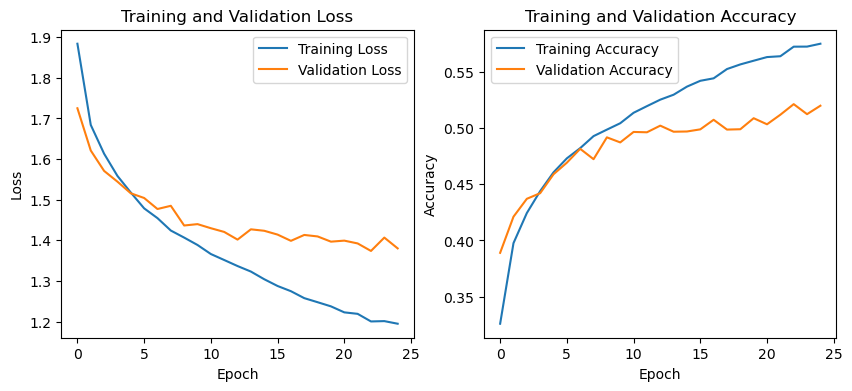

In [33]:
# Plotting the training loss and validation loss 
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plotting the training accuracy and validation accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()


### 3.3.2 Confusion Matrix

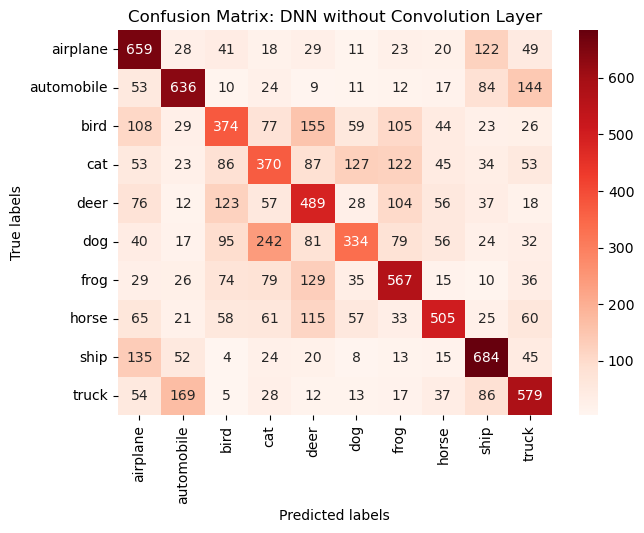

In [34]:
# Calculating the confusion matrix
confusion_matrix_dnn1 = confusion_matrix(y_test.argmax(axis=-1), y_pred_classes_dnn1)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_dnn1, annot=True, cmap='Reds', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: DNN without Convolution Layer')
plt.show()

### 3.3.3 Predictions

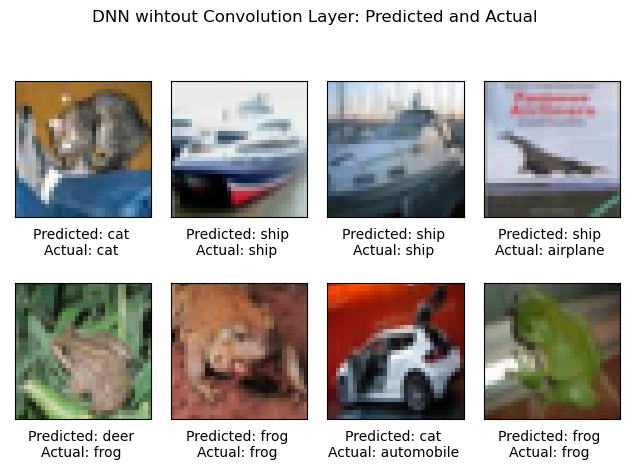

In [35]:
# Plotting the images with Predicted and Actual class
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape((32, 32, 3)), cmap=plt.cm.binary)
    predicted_label = y_pred_classes_dnn1[i]
    true_label = np.argmax(y_test[i])
    plt.xlabel("Predicted: {} \nActual: {} ".format(classes[predicted_label], classes[true_label]))
plt.suptitle('DNN wihtout Convolution Layer: Predicted and Actual')
plt.tight_layout()    
plt.show()

# 3.4 Convolution Neural Network (CNN)

In [48]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [49]:
# Defining the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [50]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 32, 32, 32)       

In [51]:
# Training the model
start_time = time.time()
history = model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test, y_test))
end_time = time.time()

Epoch 1/25


2023-04-25 01:05:05.787166: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 12s 10ms/step - loss: 1.4715 - accuracy: 0.4866 - val_loss: 1.1009 - val_accuracy: 0.6098
Epoch 2/25
782/782 [==============================] - 7s 9ms/step - loss: 1.0141 - accuracy: 0.6399 - val_loss: 1.3955 - val_accuracy: 0.5377
Epoch 3/25
782/782 [==============================] - 7s 9ms/step - loss: 0.8806 - accuracy: 0.6888 - val_loss: 0.9059 - val_accuracy: 0.6807
Epoch 4/25
782/782 [==============================] - 7s 9ms/step - loss: 0.7945 - accuracy: 0.7209 - val_loss: 0.7684 - val_accuracy: 0.7254
Epoch 5/25
782/782 [==============================] - 7s 9ms/step - loss: 0.7447 - accuracy: 0.7379 - val_loss: 0.7123 - val_accuracy: 0.7457
Epoch 6/25
782/782 [==============================] - 7s 9ms/step - loss: 0.6905 - accuracy: 0.7560 - val_loss: 0.7271 - val_accuracy: 0.7438
Epoch 7/25
782/782 [==============================] - 7s 9ms/step - loss: 0.6498 - accuracy: 0.7709 - val_loss: 0.6315 - val_accuracy: 0.7800
Epoch 8/25
782/

In [53]:
# Calculating the training time
training_time_cnn = (end_time - start_time) / 60
print('Training Time in minutes: {:.1f}'.format(training_time_cnn))

Training Time in minutes: 3.4


In [54]:
test_loss_cnn, test_acc_cnn = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_loss_cnn)
print('Test accuracy:', test_acc_cnn)

313/313 [==============================] - 1s 3ms/step - loss: 0.4792 - accuracy: 0.8408
Test loss: 0.4792335331439972
Test accuracy: 0.8407999873161316


Accuracy for CNN model is **84%**

In [55]:
# Prediction on the test set
y_pred_cnn = model.predict(x_test)

# Converting the predicted probabilities to the class labels
y_pred_classes_cnn = y_pred_cnn.argmax(axis=-1)

313/313 [==============================] - 1s 3ms/step


### 3.4.1 Training, Validation loss and accuracy 

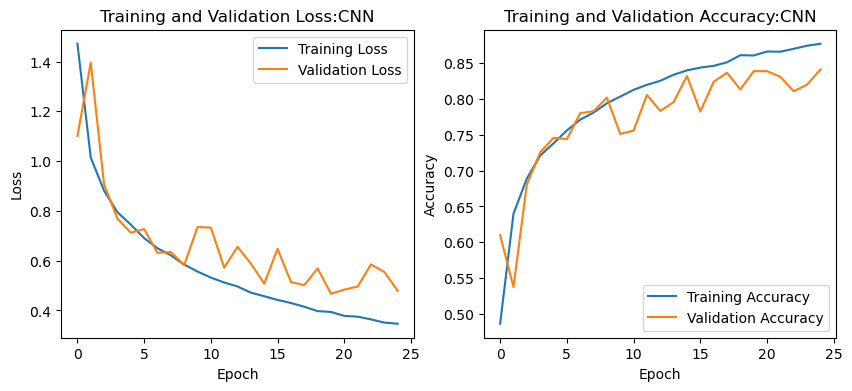

In [56]:
# Plotting the training loss and validation loss 
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss:CNN')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plotting the training accuracy and validation accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy:CNN')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

### 3.4.2 Confusion Matrix

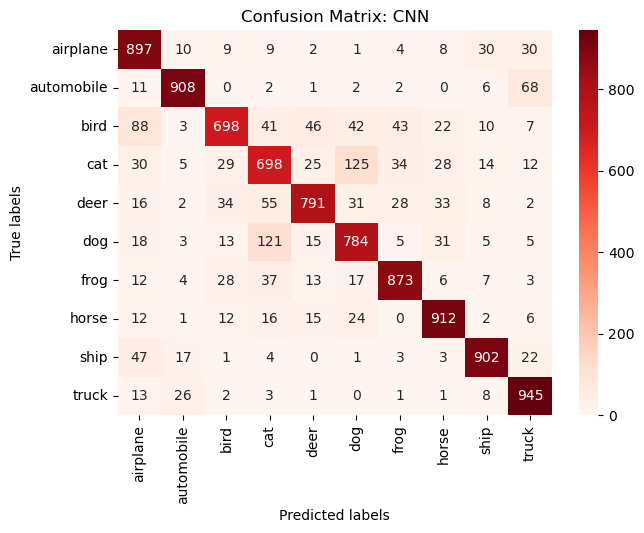

In [57]:
# Calculating the confusion matrix
confusion_matrix_cnn = confusion_matrix(y_test.argmax(axis=-1), y_pred_classes_cnn)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_cnn, annot=True, cmap='Reds', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: CNN')
plt.show()

### 3.4.3 Predictions

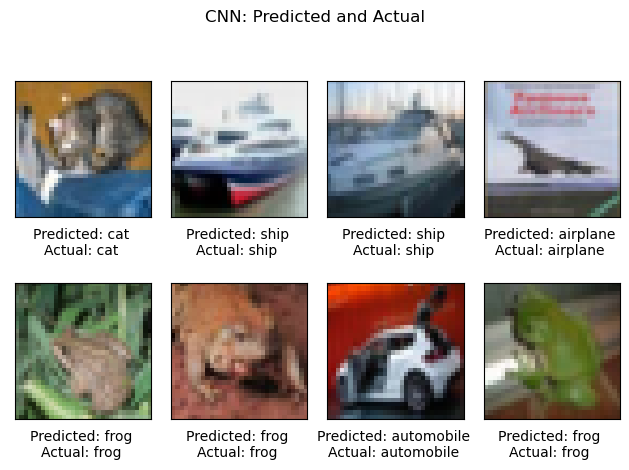

In [63]:
# Plotting the images with Predicted and Actual class
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape((32, 32, 3)), cmap=plt.cm.binary)
    predicted_label = y_pred_classes_cnn[i]
    true_label = np.argmax(y_test[i])
    plt.xlabel("Predicted: {} \nActual: {} ".format(classes[predicted_label], classes[true_label]))
plt.suptitle('CNN: Predicted and Actual')
plt.tight_layout()    
plt.show()

## Accuracies for all the models used:

1. Random Forest Classifier : 46%
2. SVM wihtout Kernel: 55%
3. DNN  without Convolution Layer: 52% 
4. Covolution Neural Network: 84%

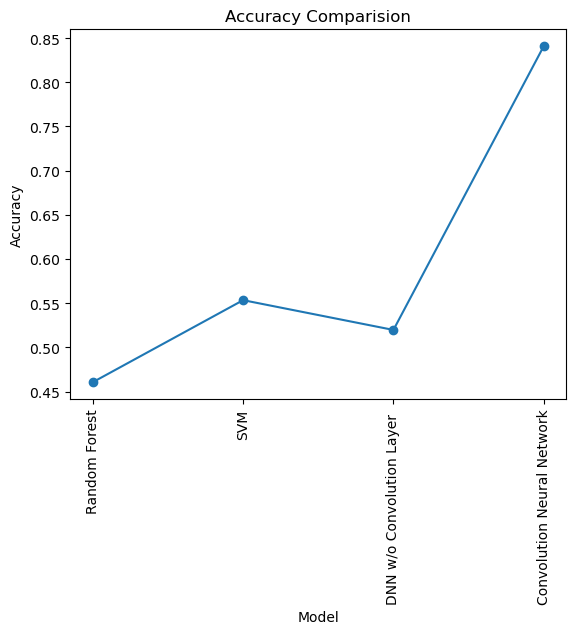

In [65]:
test_accuracies = {'Random Forest': accuracy_test_random_forest,
                   'SVM': test_accuracy_svm,
                  'DNN w/o Convolution Layer ' : test_acc_dnn1,
                  'Convolution Neural Network' : test_acc_cnn}


# plotting the test accuracies
plt.plot(list(test_accuracies.keys()), list(test_accuracies.values()), marker ='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision')
plt.xticks(rotation=90)
plt.show()